In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from netCDF4 import Dataset, num2date
from mpl_toolkits.basemap import Basemap
import pandas as pd

We are going to work with REMO model regional simmulation

##Exersise

- Open data file ('../data/1989_2008_2mTmp.nc'), 
- load variable that contains surface temperature (`var167`), 
- load lat and lon

In [2]:
from netCDF4 import Dataset
f = Dataset("../data/1989_2008_2mTmp.nc")
temp=f.variables['var167'][:]

lon = f.variables['lon'][:]
lat = f.variables['lat'][:]

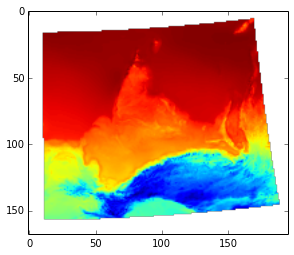

In [7]:
plt.imshow(temp[0,0,:,:])

In [4]:
lon.shape

(195,)

In [5]:
lon,lat = np.meshgrid(lon,lat)

In [6]:
from mpl_toolkits.basemap import Basemap

In [19]:
m = Basemap(llcrnrlon=55,llcrnrlat=0,urcrnrlon=105,urcrnrlat=42,projection='mill')
x, y = m(lon, lat)

<matplotlib.colorbar.Colorbar instance at 0x7f3bbdd37a28>

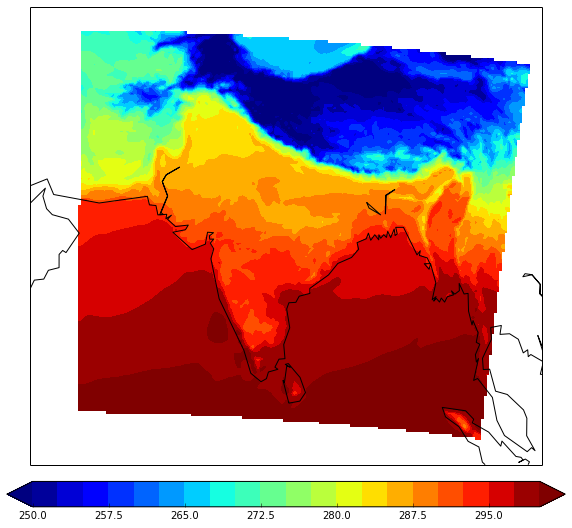

In [20]:
plt.figure(figsize=(10,10))
m.drawcoastlines()
m.contourf(x,y,temp[0,0,:,:],levels=np.linspace(250,300,21), extend="both");
plt.colorbar(orientation="horizontal", pad=0.03)
#plt.savefig('ind_temp_all.png', dpi=100)

##Exersise

- plot 7th timestep
- convert to Celsius and plot

###Increase coastline resolution

In [26]:
m = Basemap(llcrnrlon=55,llcrnrlat=0,urcrnrlon=105,urcrnrlat=42,projection='mill', resolution='i')
x, y = m(lon, lat)

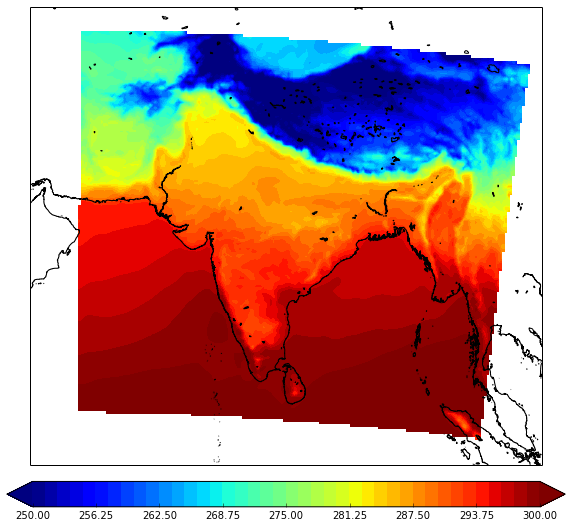

In [27]:
plt.figure(figsize=(10,10))
m.drawcoastlines()
m.contourf(x,y,temp[0,0,:,:],levels=np.linspace(250,300,41), extend="both");
plt.colorbar(orientation="horizontal", pad=0.03)

In [56]:
m = Basemap(llcrnrlon=55,llcrnrlat=0,urcrnrlon=105,urcrnrlat=42,projection='mill', resolution='c')
x, y = m(lon, lat)

<matplotlib.colorbar.Colorbar instance at 0x7f3bbdceb680>

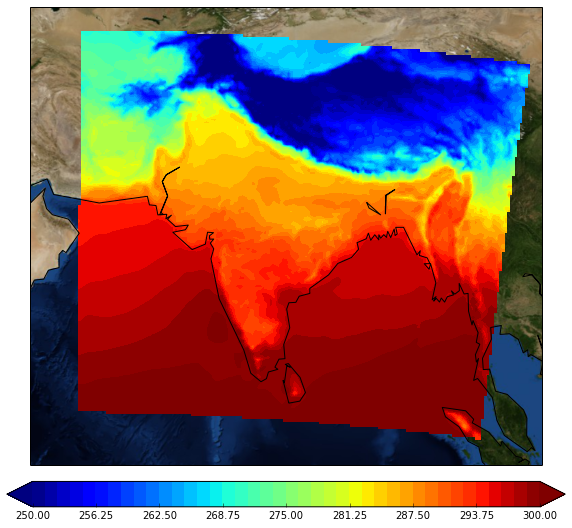

In [31]:
plt.figure(figsize=(10,10))
m.drawcoastlines()
m.bluemarble()
m.contourf(x,y,temp[0,0,:,:],levels=np.linspace(250,300,41), extend="both");
plt.colorbar(orientation="horizontal", pad=0.03)

<matplotlib.colorbar.Colorbar instance at 0x7f3bb97d05f0>

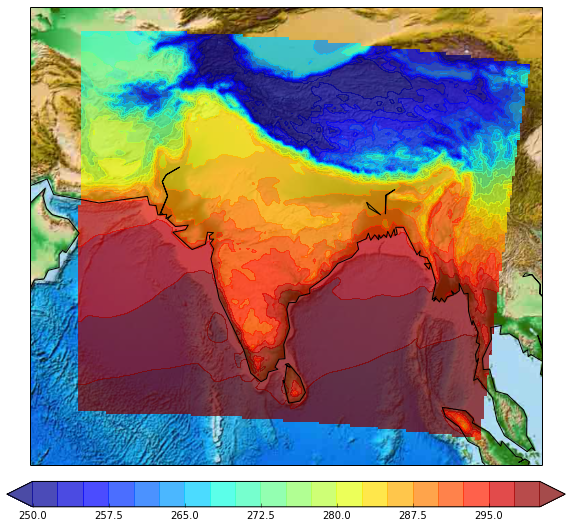

In [48]:
plt.figure(figsize=(10,10))
m.drawcoastlines()
m.etopo()
m.contourf(x,y,temp[0,0,:,:],levels=np.linspace(250,300,21), extend="both",  alpha=0.7);
plt.colorbar(orientation="horizontal", pad=0.03)

In [67]:
m = Basemap(llcrnrlon=55,llcrnrlat=0,urcrnrlon=105,urcrnrlat=42,projection='mill', resolution='c')
x, y = m(lon, lat)

<matplotlib.colorbar.Colorbar instance at 0x7f3bb3939878>

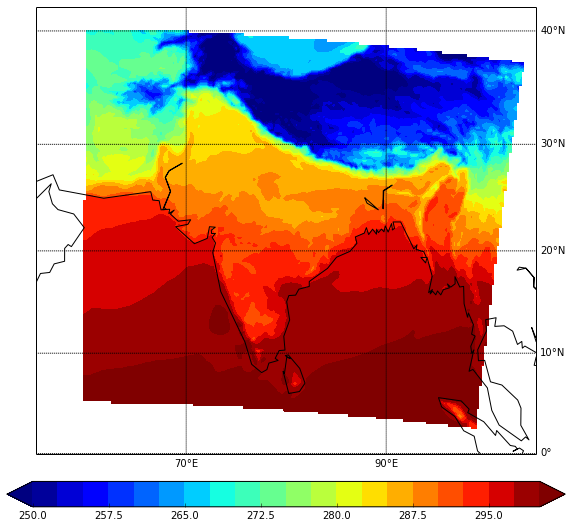

In [72]:
plt.figure(figsize=(10,10))
m.drawcoastlines()
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
m.contourf(x,y,temp[0,0,:,:],levels=np.linspace(250,300,21), extend="both");
plt.colorbar(orientation="horizontal", pad=0.05)

<matplotlib.colorbar.Colorbar instance at 0x7f3bb3126d88>

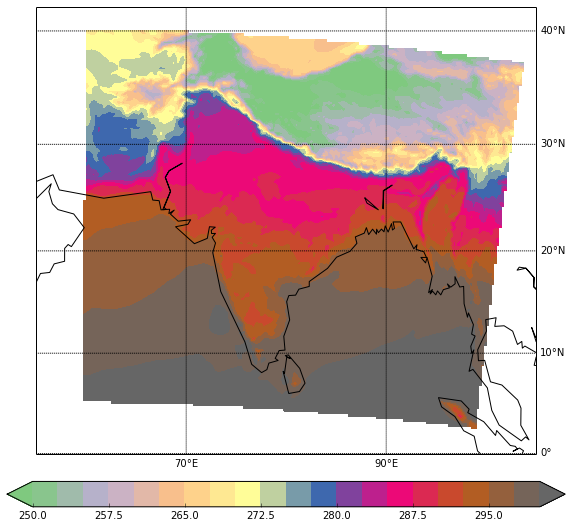

In [76]:
plt.figure(figsize=(10,10))
m.drawcoastlines()
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
m.contourf(x,y,temp[0,0,:,:],levels=np.linspace(250,300,21), extend="both", cmap=plt.cm.Accent);
plt.colorbar(orientation="horizontal", pad=0.05)

##Exersise

- Create the map, tune it according to your taste.

##Bonus example - plot data with rotated pole

In [ ]:
m = Basemap(llcrnrlon=55,llcrnrlat=0,urcrnrlon=105,urcrnrlat=42,projection='mill')
x, y = m(lon, lat)

In [16]:
m= Basemap(projection='rotpole',\
           lon_0=180-123.34,\
           lat_0=90-79.95,\
           o_lon_p=-123.34,\
           o_lat_p=79.95,\
           llcrnrlat = 4,\
           urcrnrlat = 38,\
           llcrnrlon = 59,\
           urcrnrlon = 105,\
           resolution='c')

In [17]:
x, y = m(lon, lat)

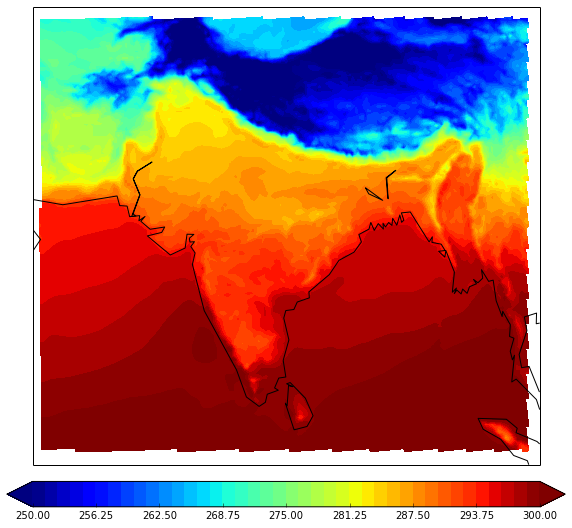

In [18]:
plt.figure(figsize=(10,10))
m.drawcoastlines()
m.contourf(x,y,temp[0,0,:,:],levels=np.linspace(250,300,41), extend="both");
plt.colorbar(orientation="horizontal", pad=0.03)
plt.savefig('ind_temp_all.png', dpi=100)

##Exersise

Plot precipitation data ('../data/1989_2008_Precip.nc')

- import nessesary modules
- open netCDF file 
- copy variables from this file
- look at the data using imshow
- create 2D versions of lon and lat (use np.meshgrid)
- create basmeap map 